In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import ast

In [2]:
df = pd.read_csv("dual_solver.csv", sep="\t")
df["iterations"]=df.iterations.apply(lambda x: ast.literal_eval(str(x)))
df["solver_time"]=df.solver_time.apply(lambda x: ast.literal_eval(str(x)))
df

,i,k,t,iterations,solver_time
0,1,0,5,"[5000, 5000, 5000]","[11.472923040390015, 11.304688692092896, 12.84..."
1,1,0,4,"[300, 300, 301]","[0.6520614624023438, 1.9806461334228516, 0.703..."
2,1,0,3,"[300, 300, 300]","[1.8930299282073975, 0.7051186561584473, 0.688..."
3,1,0,2,"[4795, 1968, 1942]","[21.277334690093994, 4.719686508178711, 8.3911..."
4,1,0,1,"[3, 3, 3]","[0.006142616271972656, 0.002992391586303711, 0..."
...,...,...,...,...,...
70,15,0,5,"[97, 97, 97]","[0.2782571315765381, 0.25571155548095703, 0.26..."
71,15,0,4,"[74, 75, 75]","[53.679675579071045, 94.58211278915405, 51.413..."
72,15,0,3,"[74, 74, 75]","[48.08476519584656, 66.41384410858154, 66.7887..."
73,15,0,2,"[52, 1787, 16]","[15.056284189224243, 1382.4249370098114, 5.399..."


In [3]:
n_iterations = df["i"].nunique()
n_samples = df["k"].nunique()
n_stages = df["t"].nunique()
n_realizations = len(df.iterations.iloc[0])

print(f"Iterations: {n_iterations}")
print(f"Samples: {n_samples}")
print(f"Stages: {n_stages}")
print(f"Realizations: {n_realizations}")

Iterations: 15
Samples: 1
Stages: 5
Realizations: 3


In [4]:
df

,i,k,t,iterations,solver_time
0,1,0,5,"[5000, 5000, 5000]","[11.472923040390015, 11.304688692092896, 12.84..."
1,1,0,4,"[300, 300, 301]","[0.6520614624023438, 1.9806461334228516, 0.703..."
2,1,0,3,"[300, 300, 300]","[1.8930299282073975, 0.7051186561584473, 0.688..."
3,1,0,2,"[4795, 1968, 1942]","[21.277334690093994, 4.719686508178711, 8.3911..."
4,1,0,1,"[3, 3, 3]","[0.006142616271972656, 0.002992391586303711, 0..."
...,...,...,...,...,...
70,15,0,5,"[97, 97, 97]","[0.2782571315765381, 0.25571155548095703, 0.26..."
71,15,0,4,"[74, 75, 75]","[53.679675579071045, 94.58211278915405, 51.413..."
72,15,0,3,"[74, 74, 75]","[48.08476519584656, 66.41384410858154, 66.7887..."
73,15,0,2,"[52, 1787, 16]","[15.056284189224243, 1382.4249370098114, 5.399..."


In [5]:
solver_times = np.array(df.solver_time.values.tolist())
solver_iterations = np.array(df.iterations.tolist())

In [6]:
dual_evaluation_times = np.divide(solver_times, solver_iterations)
dual_evaluation_times

array([[2.29458461e-03, 2.26093774e-03, 2.56803689e-03],
       [2.17353821e-03, 6.60215378e-03, 2.33769179e-03],
       [6.31009976e-03, 2.35039552e-03, 2.29627371e-03],
       [4.43740035e-03, 2.39821469e-03, 4.32086040e-03],
       [2.04753876e-03, 9.97463862e-04, 2.67259280e-03],
       [2.56626141e-03, 2.46441513e-03, 2.77852122e-03],
       [2.60614603e-02, 2.63503882e-02, 2.31837059e-02],
       [2.85314812e-02, 3.08348551e-02, 3.31784595e-02],
       [2.82622598e-02, 2.50361278e-02, 2.70798812e-02],
       [2.06777255e-02, 2.21078003e-02, 2.39448910e-02],
       [2.58212150e-03, 2.75968198e-03, 2.65609464e-03],
       [5.11334542e-02, 4.83128880e-02, 5.05814438e-02],
       [4.36649590e-02, 3.94714723e-02, 4.58186824e-02],
       [4.40619714e-02, 5.06147193e-02, 5.13684324e-02],
       [3.18091861e-02, 2.96506545e-02, 3.20446681e-02],
       [2.40515260e-03, 2.51014200e-03, 2.34490930e-03],
       [5.68926847e-02, 7.03616886e-02, 5.61409191e-02],
       [5.98385729e-02, 5.41473

In [7]:
avg_evaluation_times = np.mean(dual_evaluation_times, axis=1).tolist()
avg_evaluation_times

[0.00237451974550883,
 0.003704461259303299,
 0.0036522563298543296,
 0.00371882514724044,
 0.0019058651394314237,
 0.002603065918095379,
 0.02519851810495911,
 0.0308482652563714,
 0.0267927562702056,
 0.022243472258680255,
 0.0026659660366181747,
 0.05000926200443536,
 0.0429850379307914,
 0.0486817077293066,
 0.03116816955155094,
 0.0024200679669732603,
 0.0611317641457205,
 0.05955886459891383,
 0.0647163704966015,
 0.04866643852809091,
 0.0029745213406477938,
 0.10216501000616872,
 0.06914631216614335,
 0.06646197658646347,
 0.051988666080679154,
 0.0019198417663574216,
 0.09003508385316826,
 0.13425660133361816,
 0.06759113181986555,
 0.051748674024235115,
 0.0023142621840959716,
 0.1182475361271181,
 0.21581106595318725,
 0.10570352866165722,
 0.09872032598353664,
 0.002463229036561533,
 0.21929726158176455,
 0.1444645972925648,
 0.10440089035827882,
 0.09664318140124128,
 0.0024424686226793514,
 0.28648056716230125,
 0.21285771343099089,
 0.127081743350216,
 0.09410671891695538

In [8]:
eval_times_per_iteration = []
i=0
while i < n_iterations*n_stages:
    eval_times_per_iteration.append(avg_evaluation_times[i:i+n_stages])
    i += n_stages


iterations = [i+1 for i in range(n_iterations)]

eval_times_per_iteration = np.array(eval_times_per_iteration)


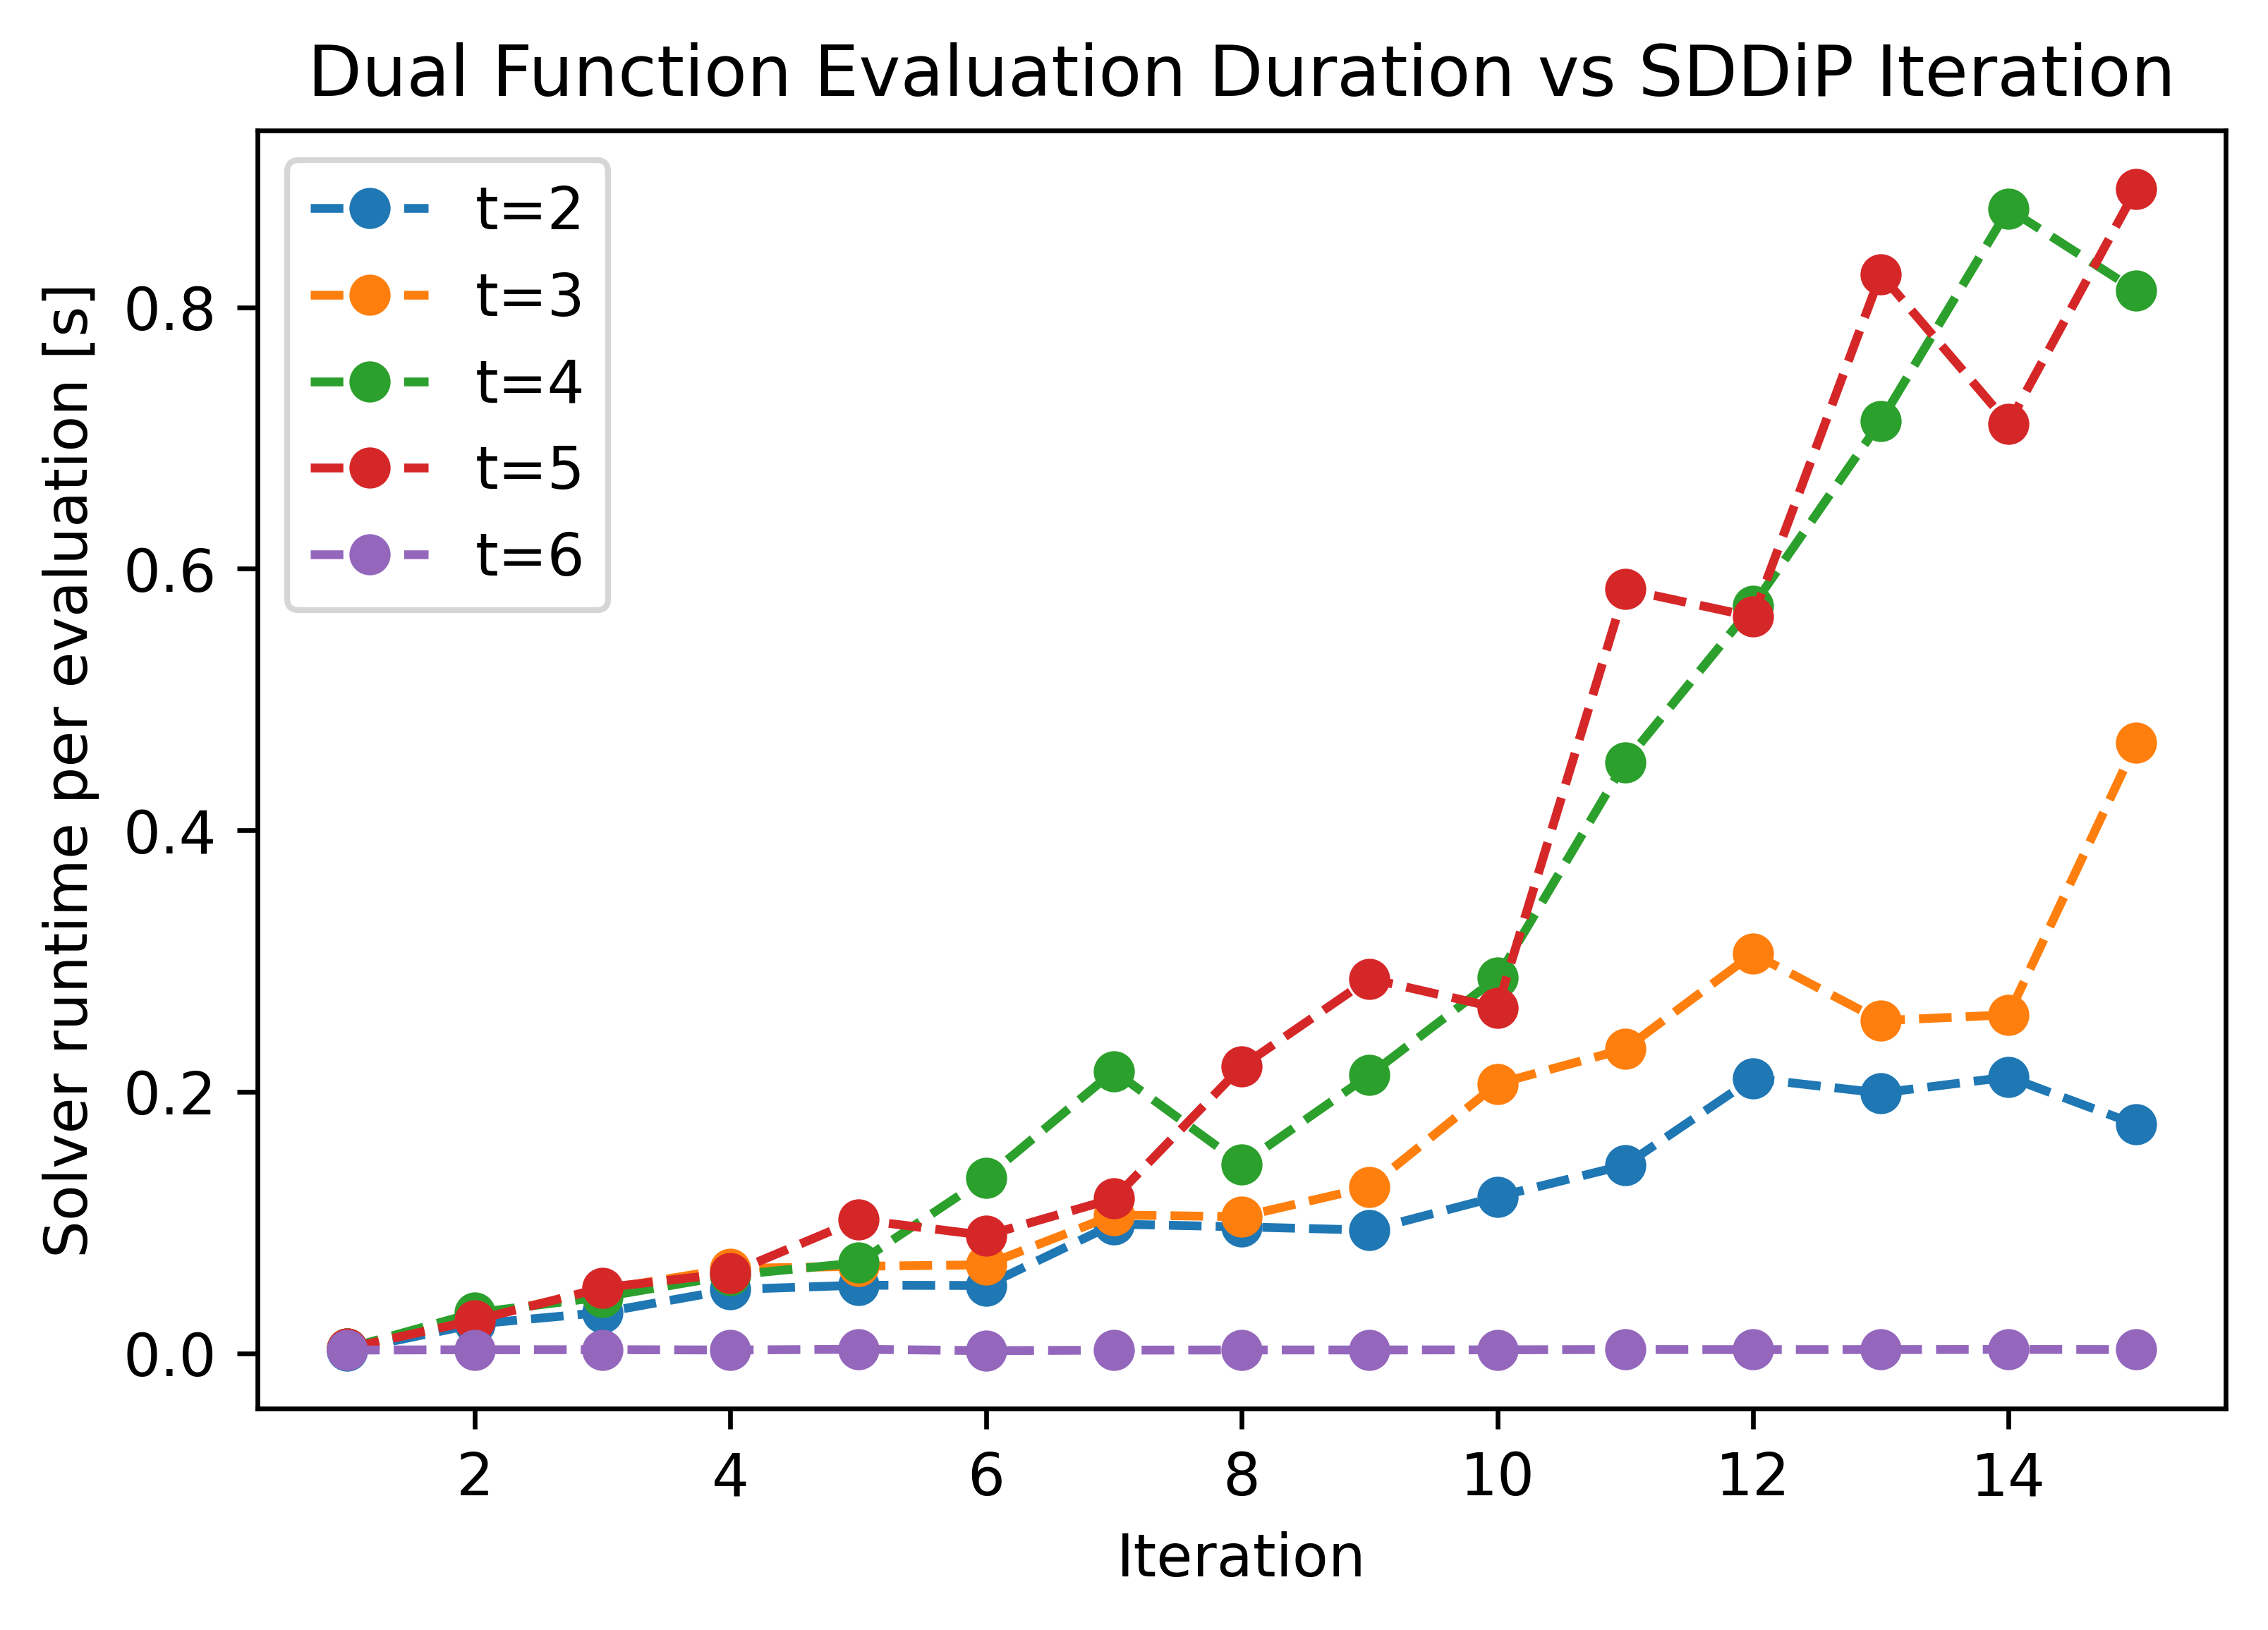

In [9]:
plt.figure(dpi= 600, facecolor='w', edgecolor='k')

for t in range(n_stages):
    plt.plot(iterations, eval_times_per_iteration[:,n_stages-(t+1)], "--o", label=f"t={t+2}")

plt.gca().set(xlabel="Iteration", ylabel="Solver runtime per evaluation [s]")
plt.title("Dual Function Evaluation Duration vs SDDiP Iteration")
plt.legend()
plt.show()